In [1]:
# load in the correct modules
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import tqdm
import cmasher as cm
from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
import warnings
warnings.filterwarnings('ignore')
import jax
from scipy import stats
import matplotlib.gridspec as grid
from matplotlib.colors import LogNorm

In [2]:
import h5py
f = h5py.File("/Users/dhortadarrington/Documents/Projects/mw-bar/data/AllClassifications_APOGEE_all_feh8_SNRc.h5","r")
# f.keys() # this would list all the APOGEE IDs, including doubles for half-integer bins
median_knot_probability = []
median_bar_probability = []
median_disc_probability = []
std_knot_probability = []
std_bar_probability = []
std_disc_probability = []
all_knot_probability = []
all_bar_probability = []
all_disc_probability = []
RxyzL = []


for key in tqdm.tqdm_notebook(f.keys()):
    median_knot_probability.append(np.nanmedian(f[key][:,2]))
    median_bar_probability.append(np.nanmedian(f[key][:,1]))
    median_disc_probability.append(np.nanmedian(f[key][:,0]))
    std_knot_probability.append(np.nanstd(f[key][:,2]))
    std_bar_probability.append(np.nanstd(f[key][:,1]))
    std_disc_probability.append(np.nanstd(f[key][:,0]))
    all_knot_probability.append((f[key][:,2]))
    all_bar_probability.append((f[key][:,1]))
    all_disc_probability.append((f[key][:,0]))
    RxyzL.append(f[key][:,3][:7])
f.close() # don't forget to close the file!


  0%|          | 0/32489 [00:00<?, ?it/s]

In [3]:
RxyzL_ = np.array(RxyzL)
R = RxyzL_[:,0]
x = RxyzL_[:,1]
y = RxyzL_[:,2]
z = RxyzL_[:,3]
Lx = RxyzL_[:,4]
Ly = RxyzL_[:,5]
Lz = RxyzL_[:,6]

In [4]:
Lz.shape

(32489,)

In [740]:
import pandas as pd

# dat0 = pd.read_csv('/Users/dhortadarrington/Desktop/allgaussians_0.0.csv')
# dat1 = pd.read_csv('/Users/dhortadarrington/Desktop/allgaussians_0.5.csv')
dat2 = pd.read_csv('/Users/dhortadarrington/Documents/Projects/mw-bar/data/allgaussians_1.0.csv')
# dat3 = pd.read_csv('/Users/dhortadarrington/Documents/Projects/mw-bar/data/allgaussians_1.5.csv')
dat4 = pd.read_csv('/Users/dhortadarrington/Documents/Projects/mw-bar/data/allgaussians_2.0.csv')
# dat5 = pd.read_csv('/Users/dhortadarrington/Desktop/allgaussians_2.5.csv')
dat6 = pd.read_csv('/Users/dhortadarrington/Documents/Projects/mw-bar/data/allgaussians_3.0.csv')
# dat7 = pd.read_csv('/Users/dhortadarrington/Desktop/allgaussians_3.5.csv')
# dat8 = pd.read_csv('/Users/dhortadarrington/Desktop/allgaussians_4.0.csv')


In [6]:
dat2[dat2['dim']=='z']

,n,dim,mean1,width1,f1,mean2,width2,f2,mean3,width3,f3
1000,0,z,168.034787,145.716299,0.366570,26.035469,121.240331,0.509268,2.414458,113.112586,0.124162
1001,1,z,167.955064,141.096266,0.328485,35.634117,122.698867,0.536821,0.748104,113.052693,0.134694
1002,2,z,168.066534,143.806341,0.351883,33.142027,122.263376,0.527358,0.024965,113.073413,0.120759
1003,3,z,146.183052,147.963929,0.397912,30.455631,121.756815,0.482863,-0.036870,113.127383,0.119226
1004,4,z,153.869417,146.193614,0.421190,28.946738,119.243706,0.452663,-0.108837,113.022048,0.126147
...,...,...,...,...,...,...,...,...,...,...,...
1495,495,z,165.729842,144.406191,0.338386,29.219016,122.542930,0.537866,0.410248,113.072428,0.123748
1496,496,z,154.299502,137.518956,0.367438,30.564623,120.887887,0.504192,2.108946,113.079537,0.128370
1497,497,z,156.999939,141.554594,0.405594,31.296918,121.827034,0.490868,-0.440882,113.084615,0.103537
1498,498,z,156.779162,147.660846,0.386960,31.787512,121.253951,0.510637,0.074645,113.025664,0.102404


In [7]:
def gaussian(x, mu, sigma,A=1.0):
    return A*np.exp(-(x - mu)**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))

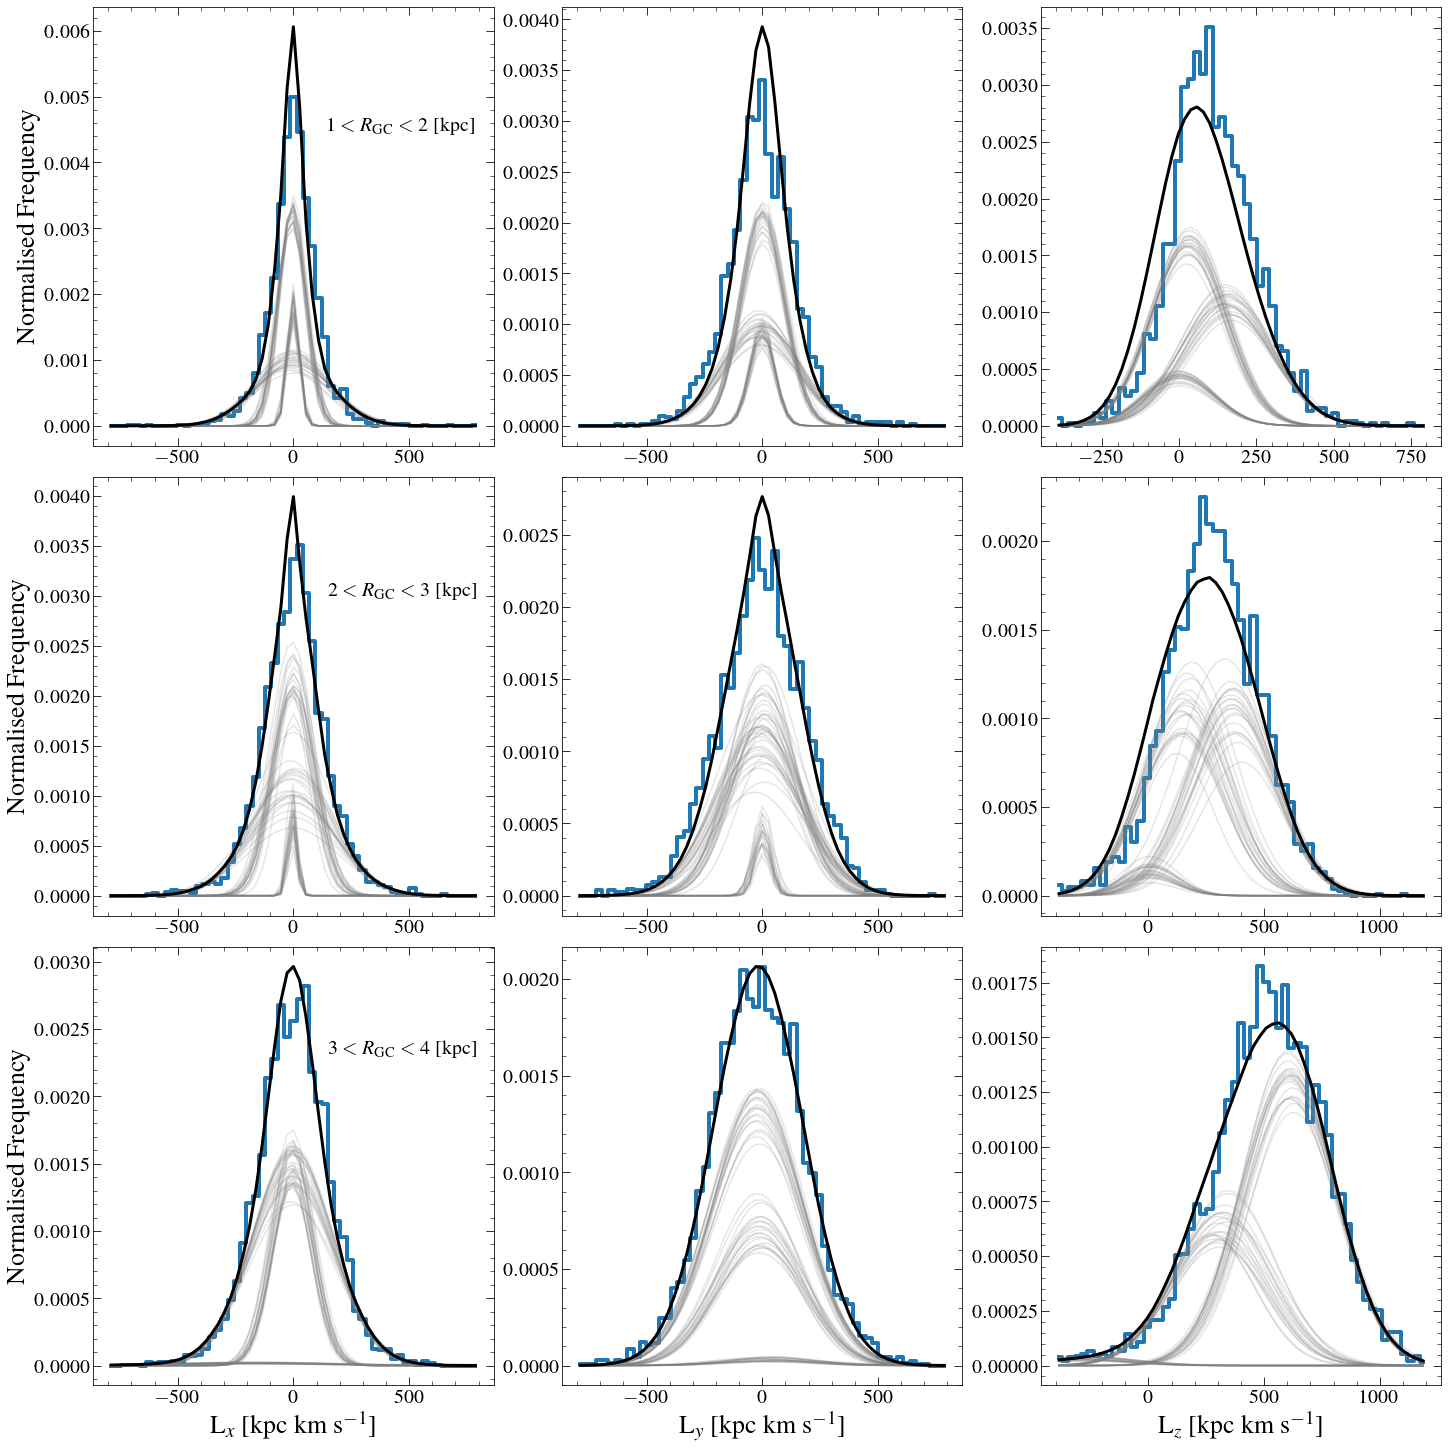

In [122]:
plt.figure(figsize=(20,20), facecolor='white', constrained_layout=True)

plt.subplot(3,3,1)
bins = np.linspace(-800,800,60)
xwidth = (bins[1]-bins[0])
xabscissa = bins[1:]-(0.5*xwidth)

hist, bin_edges = np.histogram(Lx[(R>1.)&(R<2.)],bins=bins)
inthist = np.nansum(hist)*xwidth
plt.plot(xabscissa,hist/inthist,drawstyle='steps-mid', lw=4)
total = []
for indx, i in enumerate(dat2['mean1'][dat2['dim']=='x'][0:20]):
    tot = gaussian(xabscissa, i, dat2['width1'][dat2['dim']=='x'][indx], A=dat2['f1'][dat2['dim']=='x'][indx]) +\
            gaussian(xabscissa, dat2['mean2'][dat2['dim']=='x'][indx], dat2['width2'][dat2['dim']=='x'][indx], A=dat2['f2'][dat2['dim']=='x'][indx])+\
            gaussian(xabscissa, dat2['mean3'][dat2['dim']=='x'][indx], dat2['width3'][dat2['dim']=='x'][indx], A=dat2['f3'][dat2['dim']=='x'][indx])
    total.append(tot)
    plt.plot(xabscissa, gaussian(xabscissa, i, dat2['width1'][dat2['dim']=='x'][indx], A=dat2['f1'][dat2['dim']=='x'][indx]), color='gray', alpha=0.2)
    plt.plot(xabscissa, gaussian(xabscissa, dat2['mean2'][dat2['dim']=='x'][indx], dat2['width2'][dat2['dim']=='x'][indx], A=dat2['f2'][dat2['dim']=='x'][indx]), color='gray', alpha=0.2)
    plt.plot(xabscissa, gaussian(xabscissa, dat2['mean3'][dat2['dim']=='x'][indx], dat2['width3'][dat2['dim']=='x'][indx], A=dat2['f3'][dat2['dim']=='x'][indx]), color='gray', alpha=0.2)

plt.text(150,np.max(hist/inthist)-0.0005,r'$1 < R_{\mathrm{GC}} < 2$ [kpc]', fontsize=20)
plt.plot(xabscissa, np.median(total,axis=0), color='k', lw=3)
plt.ylabel('Normalised Frequency', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()


plt.subplot(3,3,2)
bins = np.linspace(-800,800,60)
xwidth = (bins[1]-bins[0])
xabscissa = bins[1:]-(0.5*xwidth)
hist, bin_edges = np.histogram(Ly[(R>1.)&(R<2.)],bins=bins)
inthist = np.nansum(hist)*xwidth
plt.plot(xabscissa,hist/inthist,drawstyle='steps-mid', lw=4)
total = []
for indx, i in enumerate(dat2['mean1'][dat2['dim']=='y'][0:20]):
    count = 500
    tot = gaussian(xabscissa, i, dat2['width1'][dat2['dim']=='y'][count+indx], A=dat2['f1'][dat2['dim']=='y'][count+indx]) +\
            gaussian(xabscissa, dat2['mean2'][dat2['dim']=='y'][count+indx], dat2['width2'][dat2['dim']=='y'][count+indx], A=dat2['f2'][dat2['dim']=='y'][count+indx])+\
            gaussian(xabscissa, dat2['mean3'][dat2['dim']=='y'][count+indx], dat2['width3'][dat2['dim']=='y'][count+indx], A=dat2['f3'][dat2['dim']=='y'][count+indx])
    total.append(tot)
    plt.plot(xabscissa, gaussian(xabscissa, i, dat2['width1'][dat2['dim']=='y'][count+indx], A=dat2['f1'][dat2['dim']=='y'][count+indx]), color='gray', alpha=0.2)
    plt.plot(xabscissa, gaussian(xabscissa, dat2['mean2'][dat2['dim']=='y'][count+indx], dat2['width2'][dat2['dim']=='y'][count+indx], A=dat2['f2'][dat2['dim']=='y'][count+indx]), color='gray', alpha=0.2)
    plt.plot(xabscissa, gaussian(xabscissa, dat2['mean3'][dat2['dim']=='y'][count+indx], dat2['width3'][dat2['dim']=='y'][count+indx], A=dat2['f3'][dat2['dim']=='y'][count+indx]), color='gray', alpha=0.2)

# plt.text(600,np.max(hist/inthist)-0.001,r'$1 < R_{\mathrm{GC}} < 2$ [kpc]', fontsize=24)
plt.plot(xabscissa, np.median(total,axis=0), color='k', lw=3)
# plt.ylabel('Normalised Frequency', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,3,3)
bins = np.linspace(-400,800,60)
xwidth = (bins[1]-bins[0])
xabscissa = bins[1:]-(0.5*xwidth)
hist, bin_edges = np.histogram(-Lz[(R>1.)&(R<2.)],bins=bins)
inthist = np.nansum(hist)*xwidth
plt.plot(xabscissa,hist/inthist,drawstyle='steps-mid', lw=4)

total = []
for indx, i in enumerate(dat2['mean1'][dat2['dim']=='z'][0:20]):
    count = 1000
    tot = gaussian(xabscissa, i, dat2['width1'][dat2['dim']=='z'][count+indx], A=dat2['f1'][dat2['dim']=='z'][count+indx]) +\
            gaussian(xabscissa, dat2['mean2'][dat2['dim']=='z'][count+indx], dat2['width2'][dat2['dim']=='z'][count+indx], A=dat2['f2'][dat2['dim']=='z'][count+indx])+\
            gaussian(xabscissa, dat2['mean3'][dat2['dim']=='z'][count+indx], dat2['width3'][dat2['dim']=='z'][count+indx], A=dat2['f3'][dat2['dim']=='z'][count+indx])
    total.append(tot)
    plt.plot(xabscissa, gaussian(xabscissa, i, dat2['width1'][dat2['dim']=='z'][count+indx], A=dat2['f1'][dat2['dim']=='z'][count+indx]), color='gray', alpha=0.2)
    plt.plot(xabscissa, gaussian(xabscissa, dat2['mean2'][dat2['dim']=='z'][count+indx], dat2['width2'][dat2['dim']=='z'][count+indx], A=dat2['f2'][dat2['dim']=='z'][count+indx]), color='gray', alpha=0.2)
    plt.plot(xabscissa, gaussian(xabscissa, dat2['mean3'][dat2['dim']=='z'][count+indx], dat2['width3'][dat2['dim']=='z'][count+indx], A=dat2['f3'][dat2['dim']=='z'][count+indx]), color='gray', alpha=0.2)

# plt.text(600,np.max(hist/inthist)-0.001,r'$1 < R_{\mathrm{GC}} < 2$ [kpc]', fontsize=24)
plt.plot(xabscissa, np.median(total,axis=0), color='k', lw=3)
# plt.ylabel('Normalised Frequency', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()



plt.subplot(3,3,4)
bins = np.linspace(-800,800,60)
xwidth = (bins[1]-bins[0])
xabscissa = bins[1:]-(0.5*xwidth)

hist, bin_edges = np.histogram(Lx[(R>2.)&(R<3.)],bins=bins)
inthist = np.nansum(hist)*xwidth
plt.plot(xabscissa,hist/inthist,drawstyle='steps-mid', lw=4)
total = []
for indx, i in enumerate(dat4['mean1'][dat4['dim']=='x'][0:20]):
    tot = gaussian(xabscissa, i, dat4['width1'][dat4['dim']=='x'][indx], A=dat4['f1'][dat4['dim']=='x'][indx]) +\
            gaussian(xabscissa, dat4['mean2'][dat4['dim']=='x'][indx], dat4['width2'][dat4['dim']=='x'][indx], A=dat4['f2'][dat4['dim']=='x'][indx])+\
            gaussian(xabscissa, dat4['mean3'][dat4['dim']=='x'][indx], dat4['width3'][dat4['dim']=='x'][indx], A=dat4['f3'][dat4['dim']=='x'][indx])
    total.append(tot)
    plt.plot(xabscissa, gaussian(xabscissa, i, dat4['width1'][dat4['dim']=='x'][indx], A=dat4['f1'][dat4['dim']=='x'][indx]), color='gray', alpha=0.2)
    plt.plot(xabscissa, gaussian(xabscissa, dat4['mean2'][dat4['dim']=='x'][indx], dat4['width2'][dat4['dim']=='x'][indx], A=dat4['f2'][dat4['dim']=='x'][indx]), color='gray', alpha=0.2)
    plt.plot(xabscissa, gaussian(xabscissa, dat4['mean3'][dat4['dim']=='x'][indx], dat4['width3'][dat4['dim']=='x'][indx], A=dat4['f3'][dat4['dim']=='x'][indx]), color='gray', alpha=0.2)

plt.text(150,np.max(hist/inthist)-0.0005,r'$2 < R_{\mathrm{GC}} < 3$ [kpc]', fontsize=20)
plt.plot(xabscissa, np.median(total,axis=0), color='k', lw=3)
plt.ylabel('Normalised Frequency', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()


plt.subplot(3,3,5)
bins = np.linspace(-800,800,60)
xwidth = (bins[1]-bins[0])
xabscissa = bins[1:]-(0.5*xwidth)
hist, bin_edges = np.histogram(Ly[(R>2.)&(R<3.)],bins=bins)
inthist = np.nansum(hist)*xwidth
plt.plot(xabscissa,hist/inthist,drawstyle='steps-mid', lw=4)
total = []
for indx, i in enumerate(dat4['mean1'][dat4['dim']=='y'][0:20]):
    count = 500
    tot = gaussian(xabscissa, i, dat4['width1'][dat4['dim']=='y'][count+indx], A=dat4['f1'][dat4['dim']=='y'][count+indx]) +\
            gaussian(xabscissa, dat4['mean2'][dat4['dim']=='y'][count+indx], dat4['width2'][dat4['dim']=='y'][count+indx], A=dat4['f2'][dat4['dim']=='y'][count+indx])+\
            gaussian(xabscissa, dat4['mean3'][dat4['dim']=='y'][count+indx], dat4['width3'][dat4['dim']=='y'][count+indx], A=dat4['f3'][dat4['dim']=='y'][count+indx])
    total.append(tot)
    plt.plot(xabscissa, gaussian(xabscissa, i, dat4['width1'][dat4['dim']=='y'][count+indx], A=dat4['f1'][dat4['dim']=='y'][count+indx]), color='gray', alpha=0.2)
    plt.plot(xabscissa, gaussian(xabscissa, dat4['mean2'][dat4['dim']=='y'][count+indx], dat4['width2'][dat4['dim']=='y'][count+indx], A=dat4['f2'][dat4['dim']=='y'][count+indx]), color='gray', alpha=0.2)
    plt.plot(xabscissa, gaussian(xabscissa, dat4['mean3'][dat4['dim']=='y'][count+indx], dat4['width3'][dat4['dim']=='y'][count+indx], A=dat4['f3'][dat4['dim']=='y'][count+indx]), color='gray', alpha=0.2)

# plt.text(600,np.max(hist/inthist)-0.001,r'$1 < R_{\mathrm{GC}} < 2$ [kpc]', fontsize=24)
plt.plot(xabscissa, np.median(total,axis=0), color='k', lw=3)
# plt.ylabel('Normalised Frequency', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,3,6)
bins = np.linspace(-400,1200,60)
xwidth = (bins[1]-bins[0])
xabscissa = bins[1:]-(0.5*xwidth)
hist, bin_edges = np.histogram(-Lz[(R>2.)&(R<3.)],bins=bins)
inthist = np.nansum(hist)*xwidth
plt.plot(xabscissa,hist/inthist,drawstyle='steps-mid', lw=4)

total = []
for indx, i in enumerate(dat4['mean1'][dat4['dim']=='z'][0:20]):
    count = 1000
    tot = gaussian(xabscissa, i, dat4['width1'][dat4['dim']=='z'][count+indx], A=dat4['f1'][dat4['dim']=='z'][count+indx]) +\
            gaussian(xabscissa, dat4['mean2'][dat4['dim']=='z'][count+indx], dat4['width2'][dat4['dim']=='z'][count+indx], A=dat4['f2'][dat4['dim']=='z'][count+indx])+\
            gaussian(xabscissa, dat4['mean3'][dat4['dim']=='z'][count+indx], dat4['width3'][dat4['dim']=='z'][count+indx], A=dat4['f3'][dat4['dim']=='z'][count+indx])
    total.append(tot)
    plt.plot(xabscissa, gaussian(xabscissa, i, dat4['width1'][dat4['dim']=='z'][count+indx], A=dat4['f1'][dat4['dim']=='z'][count+indx]), color='gray', alpha=0.2)
    plt.plot(xabscissa, gaussian(xabscissa, dat4['mean2'][dat4['dim']=='z'][count+indx], dat4['width2'][dat4['dim']=='z'][count+indx], A=dat4['f2'][dat4['dim']=='z'][count+indx]), color='gray', alpha=0.2)
    plt.plot(xabscissa, gaussian(xabscissa, dat4['mean3'][dat4['dim']=='z'][count+indx], dat4['width3'][dat4['dim']=='z'][count+indx], A=dat4['f3'][dat4['dim']=='z'][count+indx]), color='gray', alpha=0.2)

# plt.text(600,np.max(hist/inthist)-0.001,r'$1 < R_{\mathrm{GC}} < 2$ [kpc]', fontsize=24)
plt.plot(xabscissa, np.median(total,axis=0), color='k', lw=3)
# plt.ylabel('Normalised Frequency', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()


plt.subplot(3,3,7)
bins = np.linspace(-800,800,60)
xwidth = (bins[1]-bins[0])
xabscissa = bins[1:]-(0.5*xwidth)

hist, bin_edges = np.histogram(Lx[(R>3.)&(R<4.)],bins=bins)
inthist = np.nansum(hist)*xwidth
plt.plot(xabscissa,hist/inthist,drawstyle='steps-mid', lw=4)
total = []
for indx, i in enumerate(dat6['mean1'][dat6['dim']=='x'][0:20]):
    tot = gaussian(xabscissa, i, dat6['width1'][dat6['dim']=='x'][indx], A=dat6['f1'][dat6['dim']=='x'][indx]) +\
            gaussian(xabscissa, dat6['mean2'][dat6['dim']=='x'][indx], dat6['width2'][dat6['dim']=='x'][indx], A=dat6['f2'][dat6['dim']=='x'][indx])+\
            gaussian(xabscissa, dat6['mean3'][dat6['dim']=='x'][indx], dat6['width3'][dat6['dim']=='x'][indx], A=dat6['f3'][dat6['dim']=='x'][indx])
    total.append(tot)
    plt.plot(xabscissa, gaussian(xabscissa, i, dat6['width1'][dat6['dim']=='x'][indx], A=dat6['f1'][dat6['dim']=='x'][indx]), color='gray', alpha=0.2)
    plt.plot(xabscissa, gaussian(xabscissa, dat6['mean2'][dat6['dim']=='x'][indx], dat6['width2'][dat6['dim']=='x'][indx], A=dat6['f2'][dat6['dim']=='x'][indx]), color='gray', alpha=0.2)
    plt.plot(xabscissa, gaussian(xabscissa, dat6['mean3'][dat6['dim']=='x'][indx], dat6['width3'][dat6['dim']=='x'][indx], A=dat6['f3'][dat6['dim']=='x'][indx]), color='gray', alpha=0.2)

plt.text(150,np.max(hist/inthist)-0.0005,r'$3 < R_{\mathrm{GC}} < 4$ [kpc]', fontsize=20)
plt.plot(xabscissa, np.median(total,axis=0), color='k', lw=3)
plt.ylabel('Normalised Frequency', fontsize=26)  
plt.xlabel(r'L$_{x}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()


plt.subplot(3,3,8)
bins = np.linspace(-800,800,60)
xwidth = (bins[1]-bins[0])
xabscissa = bins[1:]-(0.5*xwidth)
hist, bin_edges = np.histogram(Ly[(R>3.)&(R<4.)],bins=bins)
inthist = np.nansum(hist)*xwidth
plt.plot(xabscissa,hist/inthist,drawstyle='steps-mid', lw=4)
total = []
for indx, i in enumerate(dat6['mean1'][dat6['dim']=='y'][0:20]):
    count = 500
    tot = gaussian(xabscissa, i, dat6['width1'][dat6['dim']=='y'][count+indx], A=dat6['f1'][dat6['dim']=='y'][count+indx]) +\
            gaussian(xabscissa, dat6['mean2'][dat6['dim']=='y'][count+indx], dat6['width2'][dat6['dim']=='y'][count+indx], A=dat6['f2'][dat6['dim']=='y'][count+indx])+\
            gaussian(xabscissa, dat6['mean3'][dat6['dim']=='y'][count+indx], dat6['width3'][dat6['dim']=='y'][count+indx], A=dat6['f3'][dat6['dim']=='y'][count+indx])
    total.append(tot)
    plt.plot(xabscissa, gaussian(xabscissa, i, dat6['width1'][dat6['dim']=='y'][count+indx], A=dat6['f1'][dat6['dim']=='y'][count+indx]), color='gray', alpha=0.2)
    plt.plot(xabscissa, gaussian(xabscissa, dat6['mean2'][dat6['dim']=='y'][count+indx], dat6['width2'][dat6['dim']=='y'][count+indx], A=dat6['f2'][dat6['dim']=='y'][count+indx]), color='gray', alpha=0.2)
    plt.plot(xabscissa, gaussian(xabscissa, dat6['mean3'][dat6['dim']=='y'][count+indx], dat6['width3'][dat6['dim']=='y'][count+indx], A=dat6['f3'][dat6['dim']=='y'][count+indx]), color='gray', alpha=0.2)

# plt.text(600,np.max(hist/inthist)-0.001,r'$1 < R_{\mathrm{GC}} < 2$ [kpc]', fontsize=24)
plt.plot(xabscissa, np.median(total,axis=0), color='k', lw=3)
plt.xlabel(r'L$_{y}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,3,9)
bins = np.linspace(-400,1200,60)
xwidth = (bins[1]-bins[0])
xabscissa = bins[1:]-(0.5*xwidth)
hist, bin_edges = np.histogram(-Lz[(R>3.)&(R<4.)],bins=bins)
inthist = np.nansum(hist)*xwidth
plt.plot(xabscissa,hist/inthist,drawstyle='steps-mid', lw=4)

total = []
for indx, i in enumerate(dat6['mean1'][dat6['dim']=='z'][0:20]):
    count = 1000
    tot = gaussian(xabscissa, i, dat6['width1'][dat6['dim']=='z'][count+indx], A=dat6['f1'][dat6['dim']=='z'][count+indx]) +\
            gaussian(xabscissa, dat6['mean2'][dat6['dim']=='z'][count+indx], dat6['width2'][dat6['dim']=='z'][count+indx], A=dat6['f2'][dat6['dim']=='z'][count+indx])+\
            gaussian(xabscissa, dat6['mean3'][dat6['dim']=='z'][count+indx], dat6['width3'][dat6['dim']=='z'][count+indx], A=dat6['f3'][dat6['dim']=='z'][count+indx])
    total.append(tot)
    plt.plot(xabscissa, gaussian(xabscissa, i, dat6['width1'][dat6['dim']=='z'][count+indx], A=dat6['f1'][dat6['dim']=='z'][count+indx]), color='gray', alpha=0.2)
    plt.plot(xabscissa, gaussian(xabscissa, dat6['mean2'][dat6['dim']=='z'][count+indx], dat6['width2'][dat6['dim']=='z'][count+indx], A=dat6['f2'][dat6['dim']=='z'][count+indx]), color='gray', alpha=0.2)
    plt.plot(xabscissa, gaussian(xabscissa, dat6['mean3'][dat6['dim']=='z'][count+indx], dat6['width3'][dat6['dim']=='z'][count+indx], A=dat6['f3'][dat6['dim']=='z'][count+indx]), color='gray', alpha=0.2)

# plt.text(600,np.max(hist/inthist)-0.001,r'$1 < R_{\mathrm{GC}} < 2$ [kpc]', fontsize=24)
plt.plot(xabscissa, np.median(total,axis=0), color='k', lw=3)
# plt.ylabel('Normalised Frequency', fontsize=26)    
plt.xlabel(r'L$_{z}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()

plt.savefig('/Users/dhortadarrington/Documents/Projects/mw-bar/plots-paper/data-to-model.pdf',dpi=500, bbox_inches = 'tight')


# Make the 2D version of this plot

In [687]:
def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos."""

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N


In [894]:
## Our 2-dimensional distribution will be over variables X and Y
N = 56
L1_samples = np.linspace(-600,600,N)
L2_samples = np.linspace(-600,600,N)
L3_samples = np.linspace(-600,600,N)

#find bin centers
L1c = (L1_samples[1:]+L1_samples[:-1])/2.
L2c = (L2_samples[1:]+L2_samples[:-1])/2.
L3c = (L3_samples[1:]+L3_samples[:-1])/2.

#make a grid at the bin centers
L1, L2 = np.meshgrid(L1c, L2c) # for Lx-Ly
L1_2, L3 = np.meshgrid(L1c, L3c) # for Lx-Lz
L2_2, L3_2 = np.meshgrid(L2c, L3c) # for Ly-Lz

# Pack X and Y into a single 3-dimensional array
pos_lxly = np.empty(L1.shape + (2,))
pos_lxly[:, :, 0] = L1
pos_lxly[:, :, 1] = L2

pos_lxlz = np.empty(L1_2.shape + (2,))
pos_lxlz[:, :, 0] = L1_2
pos_lxlz[:, :, 1] = L3

pos_lylz = np.empty(L2_2.shape + (2,))
pos_lylz[:, :, 0] = L2_2
pos_lylz[:, :, 1] = L3_2

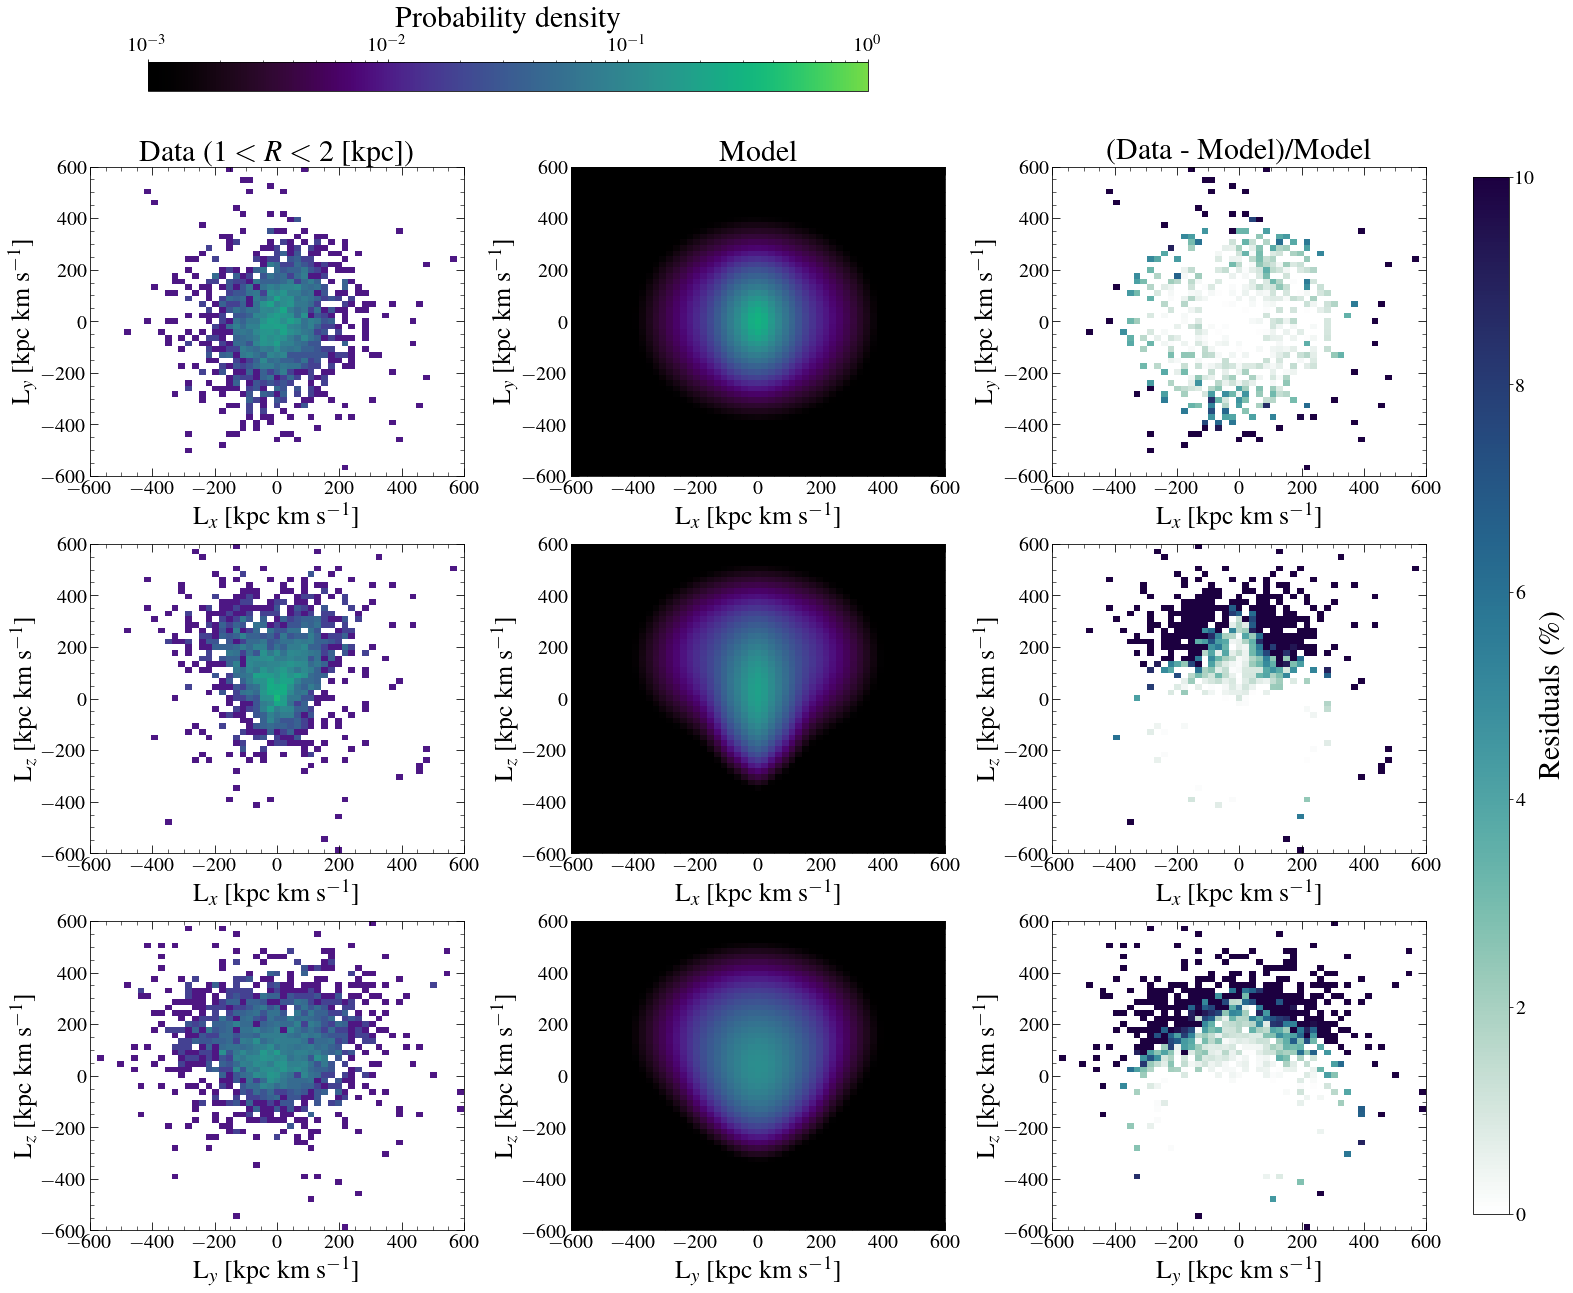

In [889]:
fig = plt.figure(figsize=(20,16), facecolor='white', constrained_layout=True)

facnorm = 1e4

plt.subplot(3,3,1)
plt.title('Data ($1 < R < 2$ [kpc])', fontsize=30)
hist, xedges,yedges = np.histogram2d(Lx[(R>1.)&(R<2.)], Ly[(R>1.)&(R<2.)],bins=[L1_samples, L2_samples])
dx, dy = L1_samples[1]-L1_samples[0], L2_samples[1]-L2_samples[0]
histnorm = np.sum(hist)*dx*dy
hist = hist/histnorm
plt.imshow(np.rot90(hist*facnorm), aspect='auto',norm = LogNorm(vmin=1e-3,vmax=1), extent=[-600,600,-600,600], cmap=cm.lavender)
plt.xlabel(r'L$_{x}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.ylabel(r'L$_{y}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
# plt.text(200,400,r'$1 < R < 2$ [kpc]', fontsize=22)

plt.subplot(3,3,2)
plt.title('Model', fontsize=30)
# component1
meanL1_comp1 = np.median(dat2['mean1'][dat2['dim']=='x'])
meanL2_comp1 = np.median(dat2['mean1'][dat2['dim']=='y'])
sigmaL1_comp1 = np.median(dat2['width1'][dat2['dim']=='x'])
sigmaL2_comp1 = np.median(dat2['width1'][dat2['dim']=='y'])
M_comp1 = np.array(([meanL1_comp1, meanL2_comp1]))
S_comp1 = np.array(([sigmaL1_comp1**2, 0.], [0., sigmaL2_comp1**2]))
# component 2
meanL1_comp2 = np.median(dat2['mean2'][dat2['dim']=='x'])
meanL2_comp2 = np.median(dat2['mean2'][dat2['dim']=='y'])
sigmaL1_comp2 = np.median(dat2['width2'][dat2['dim']=='x'])
sigmaL2_comp2 = np.median(dat2['width2'][dat2['dim']=='y'])
M_comp2 = np.array(([meanL1_comp2, meanL2_comp2]))
S_comp2 = np.array(([sigmaL1_comp2**2, 0.], [0., sigmaL2_comp2**2]))
# component 3
meanL1_comp3 = np.median(dat2['mean3'][dat2['dim']=='x'])
meanL2_comp3 = np.median(dat2['mean3'][dat2['dim']=='y'])
sigmaL1_comp3 = np.median(dat2['width3'][dat2['dim']=='x'])
sigmaL2_comp3 = np.median(dat2['width3'][dat2['dim']=='y'])
M_comp3 = np.array(([meanL1_comp3, meanL2_comp3]))
S_comp3 = np.array(([sigmaL1_comp3**2, 0.], [0., sigmaL2_comp3**2]))
# calculate the fractions
frac_comp1 = np.median(dat2['f1'][dat2['dim']=='x'])
frac_comp2 = np.median(dat2['f2'][dat2['dim']=='x'])
frac_comp3 = np.median(dat2['f3'][dat2['dim']=='x'])
Z_comp1 = multivariate_gaussian(pos_lxly, M_comp1, S_comp1)
Z_comp2 = multivariate_gaussian(pos_lxly, M_comp2, S_comp2)
Z_comp3 = multivariate_gaussian(pos_lxly, M_comp3, S_comp3)
Z_tot = Z_comp1*frac_comp1 + Z_comp2*frac_comp2 + Z_comp3*frac_comp3
# plot
plt.imshow(Z_tot*facnorm, aspect='auto',norm = LogNorm(vmin=1e-3,vmax=1), extent=[-600,600,-600,600], cmap=cm.lavender)
plt.xlabel(r'L$_{x}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.ylabel(r'L$_{y}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,3,3)
plt.title('(Data - Model)/Model', fontsize=30)
resid = (np.rot90(hist)-Z_tot[::-1])/Z_tot[::-1]
plt.imshow(resid, aspect='auto',extent=[-600,600,-600,600],cmap=cm.ocean_r, vmin=0, vmax=10)
# plt.colorbar()
plt.xlabel(r'L$_{x}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.ylabel(r'L$_{y}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,3,4)
# plt.title('Data', fontsize=30)
hist2, xedges,yedges = np.histogram2d(Lx[(R>1.)&(R<2.)], -Lz[(R>1.)&(R<2.)],bins=[L1_samples, L3_samples])
dx, dy = L1_samples[1]-L1_samples[0], L3_samples[1]-L3_samples[0]
histnorm2 = np.sum(hist2)*dx*dy
hist2 = hist2/histnorm2
plt.imshow(np.rot90(hist2*facnorm), aspect='auto',norm = LogNorm(vmin=1e-3,vmax=1), extent=[-600,600,-600,600], cmap=cm.lavender)
plt.xlabel(r'L$_{x}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.ylabel(r'L$_{z}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,3,5)
# plt.title('Model', fontsize=30)
# component1
meanL1_comp1 = np.median(dat2['mean1'][dat2['dim']=='x'])
meanL2_comp1 = np.median(dat2['mean1'][dat2['dim']=='z'])
sigmaL1_comp1 = np.median(dat2['width1'][dat2['dim']=='x'])
sigmaL2_comp1 = np.median(dat2['width1'][dat2['dim']=='z'])
M_comp1 = np.array(([meanL1_comp1, -meanL2_comp1]))
S_comp1 = np.array(([sigmaL1_comp1**2, 0.], [0., sigmaL2_comp1**2]))
# component 2
meanL1_comp2 = np.median(dat2['mean2'][dat2['dim']=='x'])
meanL2_comp2 = np.median(dat2['mean2'][dat2['dim']=='z'])
sigmaL1_comp2 = np.median(dat2['width2'][dat2['dim']=='x'])
sigmaL2_comp2 = np.median(dat2['width2'][dat2['dim']=='z'])
M_comp2 = np.array(([meanL1_comp2, -meanL2_comp2]))
S_comp2 = np.array(([sigmaL1_comp2**2, 0.], [0., sigmaL2_comp2**2]))
# component 3
meanL1_comp3 = np.median(dat2['mean3'][dat2['dim']=='x'])
meanL2_comp3 = np.median(dat2['mean3'][dat2['dim']=='z'])
sigmaL1_comp3 = np.median(dat2['width3'][dat2['dim']=='x'])
sigmaL2_comp3 = np.median(dat2['width3'][dat2['dim']=='z'])
M_comp3 = np.array(([meanL1_comp3, -meanL2_comp3]))
S_comp3 = np.array(([sigmaL1_comp3**2, 0.], [0., sigmaL2_comp3**2]))
# calculate the fractions
frac_comp1 = np.median(dat2['f1'][dat2['dim']=='x'])
frac_comp2 = np.median(dat2['f2'][dat2['dim']=='x'])
frac_comp3 = np.median(dat2['f3'][dat2['dim']=='x'])
Z_comp1 = multivariate_gaussian(pos_lxlz, M_comp1, S_comp1)
Z_comp2 = multivariate_gaussian(pos_lxlz, M_comp2, S_comp2)
Z_comp3 = multivariate_gaussian(pos_lxlz, M_comp3, S_comp3)
# Z_tot2 = Z_comp1/np.sum(Z_comp1)*frac_comp1 + Z_comp2/np.sum(Z_comp2)*frac_comp2 + Z_comp3/np.sum(Z_comp3)*frac_comp3
Z_tot2 = Z_comp1*frac_comp1 + Z_comp2*frac_comp2 + Z_comp3*frac_comp3
# plot
plt.imshow(Z_tot2*facnorm, aspect='auto',norm = LogNorm(vmin=1e-3,vmax=1), extent=[-600,600,-600,600], cmap=cm.lavender)
plt.xlabel(r'L$_{x}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.ylabel(r'L$_{z}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,3,6)
# plt.title('Residuals', fontsize=30)
resid2 = (np.rot90(hist2)-Z_tot2[::-1])/Z_tot2[::-1]
plt.imshow(resid2, aspect='auto',extent=[-600,600,-600,600],cmap=cm.ocean_r, vmin=0,vmax=10)
# plt.colorbar()
plt.xlabel(r'L$_{x}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.ylabel(r'L$_{z}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,3,7)
# plt.title('Data', fontsize=30)
hist3, xedges,yedges = np.histogram2d(Ly[(R>1.)&(R<2.)], -Lz[(R>1.)&(R<2.)],bins=[L2_samples, L3_samples])
dx, dy = L2_samples[1]-L2_samples[0], L3_samples[1]-L3_samples[0]
histnorm3 = np.sum(hist3)*dx*dy
hist3 = hist3/histnorm3
plt.imshow(np.rot90(hist3*facnorm), aspect='auto',norm = LogNorm(vmin=1e-3,vmax=1), extent=[-600,600,-600,600], cmap=cm.lavender)
plt.xlabel(r'L$_{y}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.ylabel(r'L$_{z}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,3,8)
# plt.title('Model', fontsize=30)
# component1
meanL1_comp1 = np.median(dat2['mean1'][dat2['dim']=='y'])
meanL2_comp1 = np.median(dat2['mean1'][dat2['dim']=='z'])
sigmaL1_comp1 = np.median(dat2['width1'][dat2['dim']=='y'])
sigmaL2_comp1 = np.median(dat2['width1'][dat2['dim']=='z'])
M_comp1 = np.array(([meanL1_comp1, -meanL2_comp1]))
S_comp1 = np.array(([sigmaL1_comp1**2, 0.], [0., sigmaL2_comp1**2]))
# component 2
meanL1_comp2 = np.median(dat2['mean2'][dat2['dim']=='y'])
meanL2_comp2 = np.median(dat2['mean2'][dat2['dim']=='z'])
sigmaL1_comp2 = np.median(dat2['width2'][dat2['dim']=='y'])
sigmaL2_comp2 = np.median(dat2['width2'][dat2['dim']=='z'])
M_comp2 = np.array(([meanL1_comp2, -meanL2_comp2]))
S_comp2 = np.array(([sigmaL1_comp2**2, 0.], [0., sigmaL2_comp2**2]))
# component 3
meanL1_comp3 = np.median(dat2['mean3'][dat2['dim']=='y'])
meanL2_comp3 = np.median(dat2['mean3'][dat2['dim']=='z'])
sigmaL1_comp3 = np.median(dat2['width3'][dat2['dim']=='y'])
sigmaL2_comp3 = np.median(dat2['width3'][dat2['dim']=='z'])
M_comp3 = np.array(([meanL1_comp3, -meanL2_comp3]))
S_comp3 = np.array(([sigmaL1_comp3**2, 0.], [0., sigmaL2_comp3**2]))
# calculate the fractions
frac_comp1 = np.median(dat2['f1'][dat2['dim']=='y'])
frac_comp2 = np.median(dat2['f2'][dat2['dim']=='y'])
frac_comp3 = np.median(dat2['f3'][dat2['dim']=='y'])
Z_comp1 = multivariate_gaussian(pos_lylz, M_comp1, S_comp1)
Z_comp2 = multivariate_gaussian(pos_lylz, M_comp2, S_comp2)
Z_comp3 = multivariate_gaussian(pos_lylz, M_comp3, S_comp3)
Z_tot3 = Z_comp1*frac_comp1 + Z_comp2*frac_comp2 + Z_comp3*frac_comp3
# plot
cb2 = plt.imshow(Z_tot3*facnorm, aspect='auto',norm = LogNorm(vmin=1e-3,vmax=1), extent=[-600,600,-600,600], cmap=cm.lavender)
plt.xlabel(r'L$_{y}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.ylabel(r'L$_{z}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,3,9)
# plt.title('Residuals', fontsize=30)
resid3 = (np.rot90(hist3)-Z_tot3[::-1])/Z_tot3[::-1]
cb = plt.imshow(resid3, aspect='auto',extent=[-600,600,-600,600],cmap=cm.ocean_r, vmin=0,vmax=10)
# plt.colorbar()
plt.xlabel(r'L$_{y}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.ylabel(r'L$_{z}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()

#plot colorbars
cax = fig.add_axes([1.02,0.065,0.025,0.9])
cax2 = fig.add_axes([0.1,1.04,0.5,0.025])
cbar = fig.colorbar(cb, cax=cax)
cbar2 = fig.colorbar(cb2, cax=cax2, orientation='horizontal')
cax2.xaxis.set_ticks_position('top')
cax2.xaxis.set_label_position('top')
cbar.set_label(label=r'Residuals ($\%$)',fontsize=30)
cbar2.set_label(label=r'Probability density',fontsize=30, labelpad=10)
cbar.ax.tick_params(labelsize=20)
cbar2.ax.tick_params(labelsize=20)

plt.savefig('/Users/dhortadarrington/Documents/Projects/mw-bar/plots-paper/data-to-model-2D-12kpcbin-divided.pdf',dpi=500, bbox_inches = 'tight')


In [904]:
np.median(dat2['mean3'][dat2['dim']=='y'])

0.0023043682958459

In [901]:
## Our 2-dimensional distribution will be over variables X and Y
N = 56
L1_samples = np.linspace(-600,600,N)
L2_samples = np.linspace(-600,600,N)
L3_samples = np.linspace(-400,800,N)

#find bin centers
L1c = (L1_samples[1:]+L1_samples[:-1])/2.
L2c = (L2_samples[1:]+L2_samples[:-1])/2.
L3c = (L3_samples[1:]+L3_samples[:-1])/2.

#make a grid at the bin centers
L1, L2 = np.meshgrid(L1c, L2c) # for Lx-Ly
L1_2, L3 = np.meshgrid(L1c, L3c) # for Lx-Lz
L2_2, L3_2 = np.meshgrid(L2c, L3c) # for Ly-Lz

# Pack X and Y into a single 3-dimensional array
pos_lxly = np.empty(L1.shape + (2,))
pos_lxly[:, :, 0] = L1
pos_lxly[:, :, 1] = L2

pos_lxlz = np.empty(L1_2.shape + (2,))
pos_lxlz[:, :, 0] = L1_2
pos_lxlz[:, :, 1] = L3

pos_lylz = np.empty(L2_2.shape + (2,))
pos_lylz[:, :, 0] = L2_2
pos_lylz[:, :, 1] = L3_2

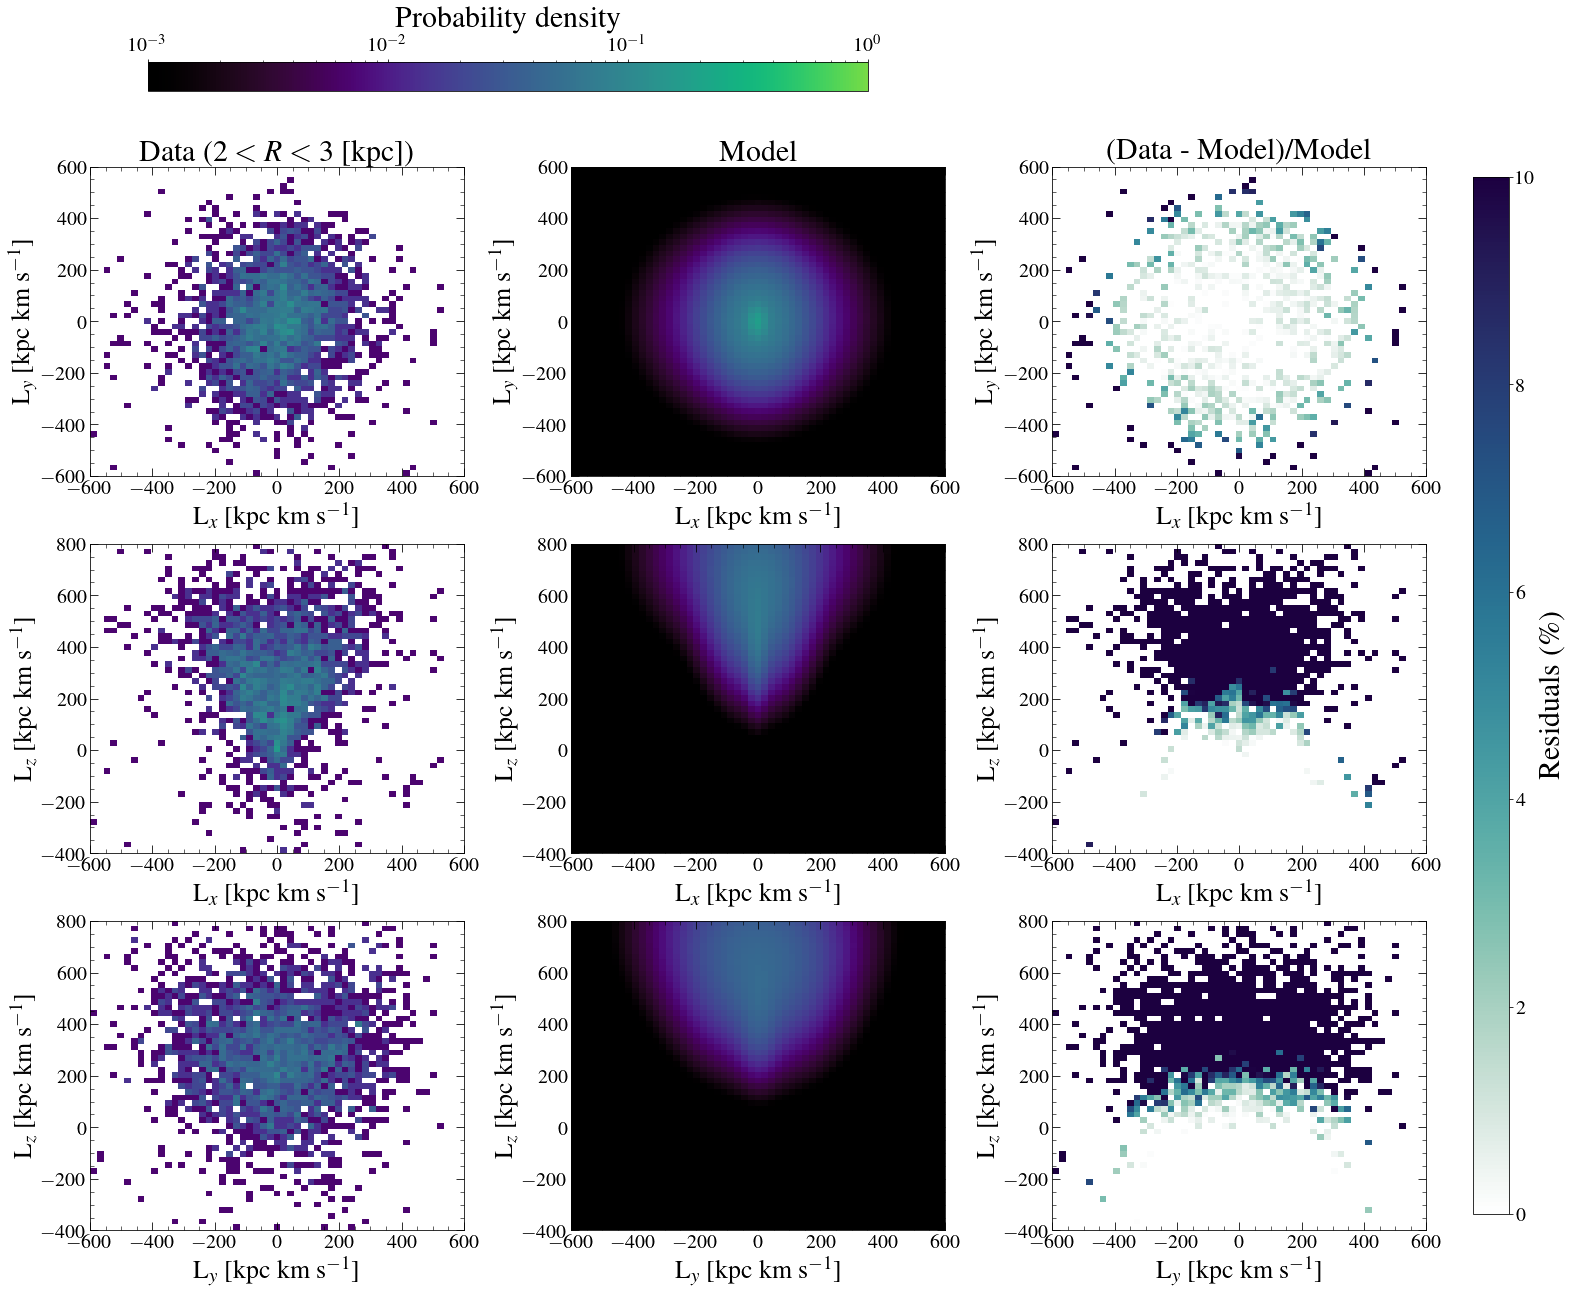

In [902]:
fig = plt.figure(figsize=(20,16), facecolor='white', constrained_layout=True)

facnorm = 1e4

plt.subplot(3,3,1)
plt.title('Data ($2 < R < 3$ [kpc])', fontsize=30)
hist, xedges,yedges = np.histogram2d(Lx[(R>2.)&(R<3.)], Ly[(R>2.)&(R<3.)],bins=[L1_samples, L2_samples])
dx, dy = L1_samples[1]-L1_samples[0], L2_samples[1]-L2_samples[0]
histnorm = np.sum(hist)*dx*dy
hist = hist/histnorm
plt.imshow(np.rot90(hist*facnorm), aspect='auto',norm = LogNorm(vmin=1e-3,vmax=1), extent=[-600,600,-600,600], cmap=cm.lavender)
plt.xlabel(r'L$_{x}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.ylabel(r'L$_{y}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
# plt.text(200,400,r'$1 < R < 2$ [kpc]', fontsize=22)

plt.subplot(3,3,2)
plt.title('Model', fontsize=30)
# component1
meanL1_comp1 = np.median(dat4['mean1'][dat4['dim']=='x'])
meanL2_comp1 = np.median(dat4['mean1'][dat4['dim']=='y'])
sigmaL1_comp1 = np.median(dat4['width1'][dat4['dim']=='x'])
sigmaL2_comp1 = np.median(dat4['width1'][dat4['dim']=='y'])
M_comp1 = np.array(([meanL1_comp1, meanL2_comp1]))
S_comp1 = np.array(([sigmaL1_comp1**2, 0.], [0., sigmaL2_comp1**2]))
# component 2
meanL1_comp2 = np.median(dat4['mean2'][dat4['dim']=='x'])
meanL2_comp2 = np.median(dat4['mean2'][dat4['dim']=='y'])
sigmaL1_comp2 = np.median(dat4['width2'][dat4['dim']=='x'])
sigmaL2_comp2 = np.median(dat4['width2'][dat4['dim']=='y'])
M_comp2 = np.array(([meanL1_comp2, meanL2_comp2]))
S_comp2 = np.array(([sigmaL1_comp2**2, 0.], [0., sigmaL2_comp2**2]))
# component 3
meanL1_comp3 = np.median(dat4['mean3'][dat4['dim']=='x'])
meanL2_comp3 = np.median(dat4['mean3'][dat4['dim']=='y'])
sigmaL1_comp3 = np.median(dat4['width3'][dat4['dim']=='x'])
sigmaL2_comp3 = np.median(dat4['width3'][dat4['dim']=='y'])
M_comp3 = np.array(([meanL1_comp3, meanL2_comp3]))
S_comp3 = np.array(([sigmaL1_comp3**2, 0.], [0., sigmaL2_comp3**2]))
# calculate the fractions
frac_comp1 = np.median(dat4['f1'][dat4['dim']=='x'])
frac_comp2 = np.median(dat4['f2'][dat4['dim']=='x'])
frac_comp3 = np.median(dat4['f3'][dat4['dim']=='x'])
Z_comp1 = multivariate_gaussian(pos_lxly, M_comp1, S_comp1)
Z_comp2 = multivariate_gaussian(pos_lxly, M_comp2, S_comp2)
Z_comp3 = multivariate_gaussian(pos_lxly, M_comp3, S_comp3)
Z_tot = Z_comp1*frac_comp1 + Z_comp2*frac_comp2 + Z_comp3*frac_comp3
# plot
plt.imshow(Z_tot*facnorm, aspect='auto',norm = LogNorm(vmin=1e-3,vmax=1), extent=[-600,600,-600,600], cmap=cm.lavender)
plt.xlabel(r'L$_{x}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.ylabel(r'L$_{y}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,3,3)
plt.title('(Data - Model)/Model', fontsize=30)
resid = (np.rot90(hist)-Z_tot[::-1])/Z_tot[::-1]
plt.imshow(resid, aspect='auto',extent=[-600,600,-600,600],cmap=cm.ocean_r, vmin=0, vmax=10)
# plt.colorbar()
plt.xlabel(r'L$_{x}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.ylabel(r'L$_{y}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,3,4)
# plt.title('Data', fontsize=30)
hist2, xedges,yedges = np.histogram2d(Lx[(R>2.)&(R<3.)], -Lz[(R>2.)&(R<3.)],bins=[L1_samples, L3_samples])
dx, dy = L1_samples[1]-L1_samples[0], L3_samples[1]-L3_samples[0]
histnorm2 = np.sum(hist2)*dx*dy
hist2 = hist2/histnorm2
plt.imshow(np.rot90(hist2*facnorm), aspect='auto',norm = LogNorm(vmin=1e-3,vmax=1), extent=[-600,600,-400,800], cmap=cm.lavender)
plt.xlabel(r'L$_{x}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.ylabel(r'L$_{z}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,3,5)
# plt.title('Model', fontsize=30)
# component1
meanL1_comp1 = np.median(dat4['mean1'][dat4['dim']=='x'])
meanL2_comp1 = np.median(dat4['mean1'][dat4['dim']=='z'])
sigmaL1_comp1 = np.median(dat4['width1'][dat4['dim']=='x'])
sigmaL2_comp1 = np.median(dat4['width1'][dat4['dim']=='z'])
M_comp1 = np.array(([meanL1_comp1, -meanL2_comp1]))
S_comp1 = np.array(([sigmaL1_comp1**2, 0.], [0., sigmaL2_comp1**2]))
# component 2
meanL1_comp2 = np.median(dat4['mean2'][dat4['dim']=='x'])
meanL2_comp2 = np.median(dat4['mean2'][dat4['dim']=='z'])
sigmaL1_comp2 = np.median(dat4['width2'][dat4['dim']=='x'])
sigmaL2_comp2 = np.median(dat4['width2'][dat4['dim']=='z'])
M_comp2 = np.array(([meanL1_comp2, -meanL2_comp2]))
S_comp2 = np.array(([sigmaL1_comp2**2, 0.], [0., sigmaL2_comp2**2]))
# component 3
meanL1_comp3 = np.median(dat4['mean3'][dat4['dim']=='x'])
meanL2_comp3 = np.median(dat4['mean3'][dat4['dim']=='z'])
sigmaL1_comp3 = np.median(dat4['width3'][dat4['dim']=='x'])
sigmaL2_comp3 = np.median(dat4['width3'][dat4['dim']=='z'])
M_comp3 = np.array(([meanL1_comp3, -meanL2_comp3]))
S_comp3 = np.array(([sigmaL1_comp3**2, 0.], [0., sigmaL2_comp3**2]))
# calculate the fractions
frac_comp1 = np.median(dat4['f1'][dat4['dim']=='x'])
frac_comp2 = np.median(dat4['f2'][dat4['dim']=='x'])
frac_comp3 = np.median(dat4['f3'][dat4['dim']=='x'])
Z_comp1 = multivariate_gaussian(pos_lxlz, M_comp1, S_comp1)
Z_comp2 = multivariate_gaussian(pos_lxlz, M_comp2, S_comp2)
Z_comp3 = multivariate_gaussian(pos_lxlz, M_comp3, S_comp3)
# Z_tot2 = Z_comp1/np.sum(Z_comp1)*frac_comp1 + Z_comp2/np.sum(Z_comp2)*frac_comp2 + Z_comp3/np.sum(Z_comp3)*frac_comp3
Z_tot2 = Z_comp1*frac_comp1 + Z_comp2*frac_comp2 + Z_comp3*frac_comp3
# plot
plt.imshow(Z_tot2*facnorm, aspect='auto',norm = LogNorm(vmin=1e-3,vmax=1), extent=[-600,600,-400,800], cmap=cm.lavender)
plt.xlabel(r'L$_{x}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.ylabel(r'L$_{z}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,3,6)
# plt.title('Residuals', fontsize=30)
resid2 = (np.rot90(hist2)-Z_tot2[::-1])/Z_tot2[::-1]
plt.imshow(resid2, aspect='auto',extent=[-600,600,-400,800],cmap=cm.ocean_r, vmin=0,vmax=10)
# plt.colorbar()
plt.xlabel(r'L$_{x}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.ylabel(r'L$_{z}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,3,7)
# plt.title('Data', fontsize=30)
hist3, xedges,yedges = np.histogram2d(Ly[(R>2.)&(R<3.)], -Lz[(R>2.)&(R<3.)],bins=[L2_samples, L3_samples])
dx, dy = L2_samples[1]-L2_samples[0], L3_samples[1]-L3_samples[0]
histnorm3 = np.sum(hist3)*dx*dy
hist3 = hist3/histnorm3
plt.imshow(np.rot90(hist3*facnorm), aspect='auto',norm = LogNorm(vmin=1e-3,vmax=1), extent=[-600,600,-400,800], cmap=cm.lavender)
plt.xlabel(r'L$_{y}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.ylabel(r'L$_{z}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,3,8)
# plt.title('Model', fontsize=30)
# component1
meanL1_comp1 = np.median(dat4['mean1'][dat4['dim']=='y'])
meanL2_comp1 = np.median(dat4['mean1'][dat4['dim']=='z'])
sigmaL1_comp1 = np.median(dat4['width1'][dat4['dim']=='y'])
sigmaL2_comp1 = np.median(dat4['width1'][dat4['dim']=='z'])
M_comp1 = np.array(([meanL1_comp1, -meanL2_comp1]))
S_comp1 = np.array(([sigmaL1_comp1**2, 0.], [0., sigmaL2_comp1**2]))
# component 2
meanL1_comp2 = np.median(dat4['mean2'][dat4['dim']=='y'])
meanL2_comp2 = np.median(dat4['mean2'][dat4['dim']=='z'])
sigmaL1_comp2 = np.median(dat4['width2'][dat4['dim']=='y'])
sigmaL2_comp2 = np.median(dat4['width2'][dat4['dim']=='z'])
M_comp2 = np.array(([meanL1_comp2, -meanL2_comp2]))
S_comp2 = np.array(([sigmaL1_comp2**2, 0.], [0., sigmaL2_comp2**2]))
# component 3
meanL1_comp3 = np.median(dat4['mean3'][dat4['dim']=='y'])
meanL2_comp3 = np.median(dat4['mean3'][dat4['dim']=='z'])
sigmaL1_comp3 = np.median(dat4['width3'][dat4['dim']=='y'])
sigmaL2_comp3 = np.median(dat4['width3'][dat4['dim']=='z'])
M_comp3 = np.array(([meanL1_comp3, -meanL2_comp3]))
S_comp3 = np.array(([sigmaL1_comp3**2, 0.], [0., sigmaL2_comp3**2]))
# calculate the fractions
frac_comp1 = np.median(dat4['f1'][dat4['dim']=='y'])
frac_comp2 = np.median(dat4['f2'][dat4['dim']=='y'])
frac_comp3 = np.median(dat4['f3'][dat4['dim']=='y'])
Z_comp1 = multivariate_gaussian(pos_lylz, M_comp1, S_comp1)
Z_comp2 = multivariate_gaussian(pos_lylz, M_comp2, S_comp2)
Z_comp3 = multivariate_gaussian(pos_lylz, M_comp3, S_comp3)
Z_tot3 = Z_comp1*frac_comp1 + Z_comp2*frac_comp2 + Z_comp3*frac_comp3
# plot
cb2 = plt.imshow(Z_tot3*facnorm, aspect='auto',norm = LogNorm(vmin=1e-3,vmax=1), extent=[-600,600,-400,800], cmap=cm.lavender)
plt.xlabel(r'L$_{y}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.ylabel(r'L$_{z}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,3,9)
# plt.title('Residuals', fontsize=30)
resid3 = (np.rot90(hist3)-Z_tot3[::-1])/Z_tot3[::-1]
cb = plt.imshow(resid3, aspect='auto',extent=[-600,600,-400,800],cmap=cm.ocean_r, vmin=0,vmax=10)
# plt.colorbar()
plt.xlabel(r'L$_{y}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.ylabel(r'L$_{z}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()

#plot colorbars
cax = fig.add_axes([1.02,0.065,0.025,0.9])
cax2 = fig.add_axes([0.1,1.04,0.5,0.025])
cbar = fig.colorbar(cb, cax=cax)
cbar2 = fig.colorbar(cb2, cax=cax2, orientation='horizontal')
cax2.xaxis.set_ticks_position('top')
cax2.xaxis.set_label_position('top')
cbar.set_label(label=r'Residuals ($\%$)',fontsize=30)
cbar2.set_label(label=r'Probability density',fontsize=30, labelpad=10)
cbar.ax.tick_params(labelsize=20)
cbar2.ax.tick_params(labelsize=20)


# plt.savefig('/Users/dhortadarrington/Documents/Projects/mw-bar/plots-paper/data-to-model-2D-12kpcbin-divided.pdf',dpi=500, bbox_inches = 'tight')


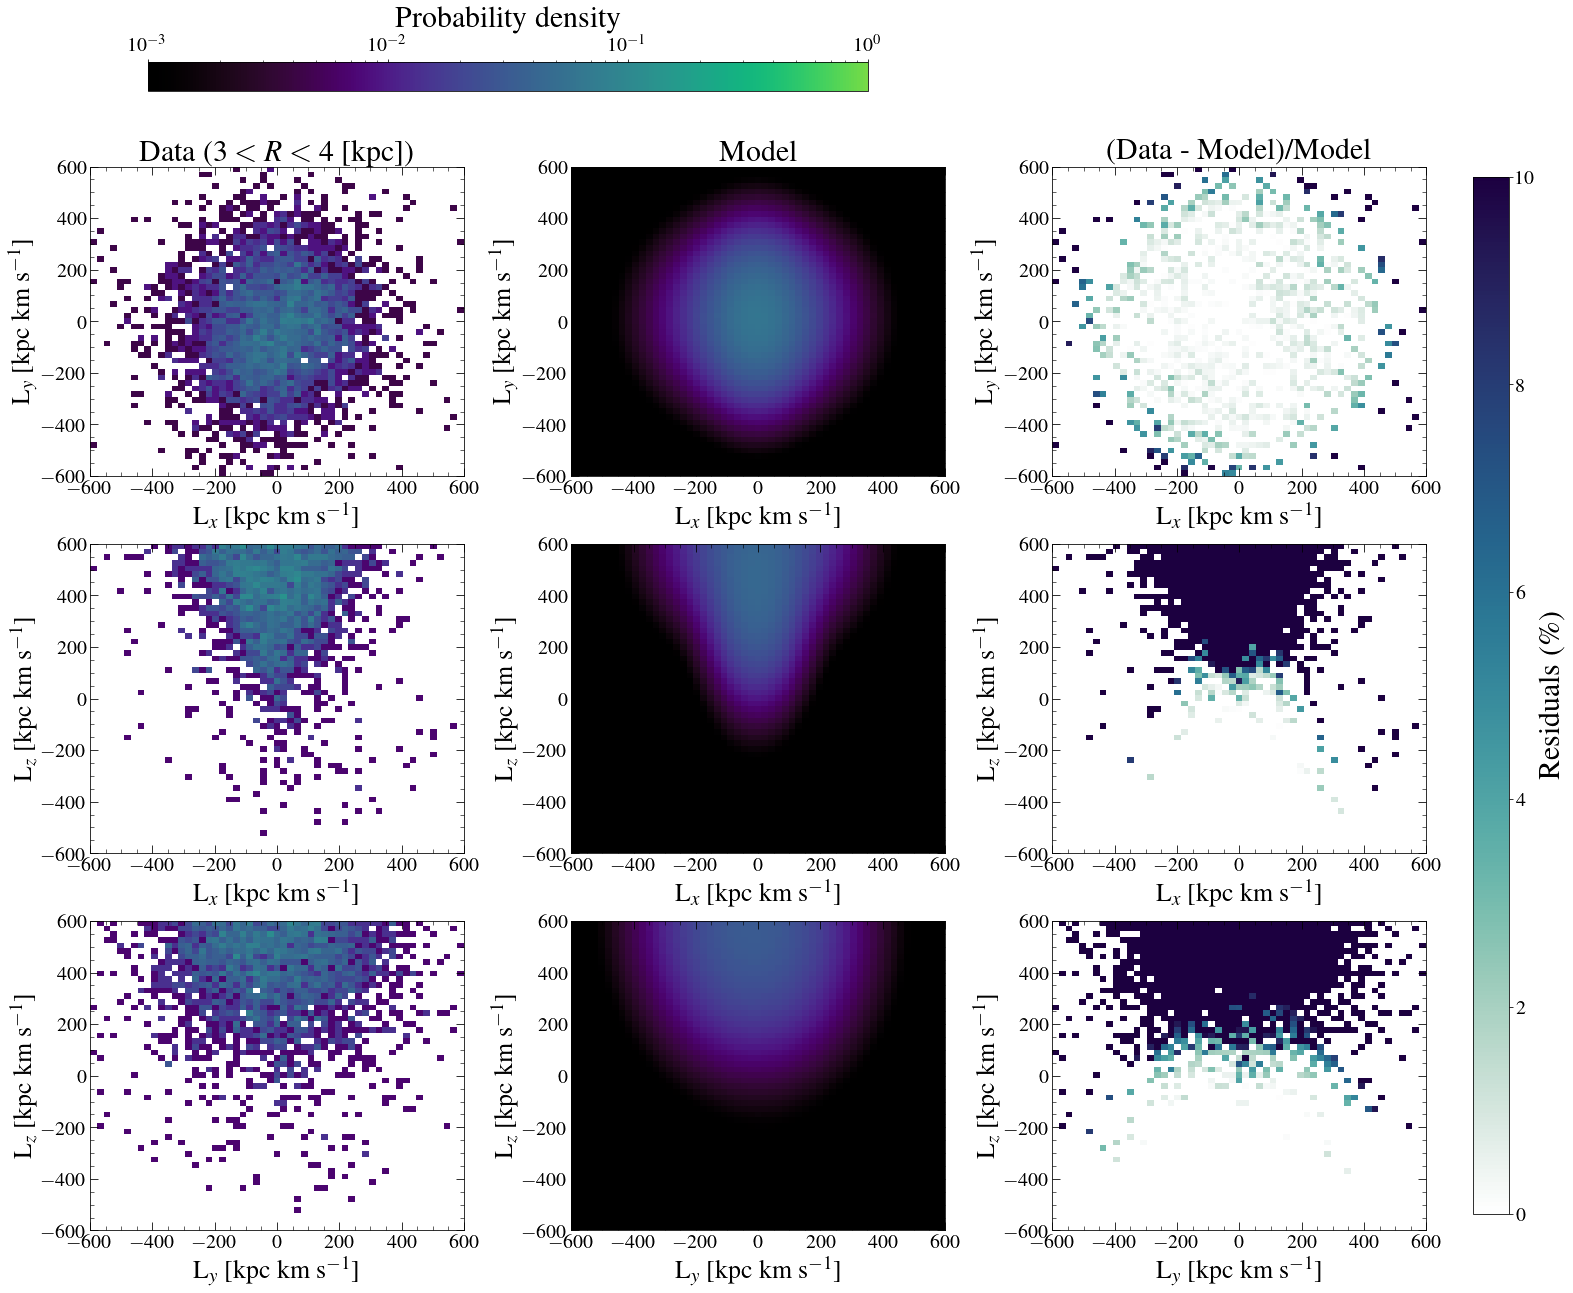

In [897]:
fig = plt.figure(figsize=(20,16), facecolor='white', constrained_layout=True)

facnorm = 1e4

plt.subplot(3,3,1)
plt.title('Data ($3 < R < 4$ [kpc])', fontsize=30)
hist, xedges,yedges = np.histogram2d(Lx[(R>3.)&(R<4.)], Ly[(R>3.)&(R<4.)],bins=[L1_samples, L2_samples])
dx, dy = L1_samples[1]-L1_samples[0], L2_samples[1]-L2_samples[0]
histnorm = np.sum(hist)*dx*dy
hist = hist/histnorm
plt.imshow(np.rot90(hist*facnorm), aspect='auto',norm = LogNorm(vmin=1e-3,vmax=1), extent=[-600,600,-600,600], cmap=cm.lavender)
plt.xlabel(r'L$_{x}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.ylabel(r'L$_{y}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
# plt.text(200,400,r'$1 < R < 2$ [kpc]', fontsize=22)

plt.subplot(3,3,2)
plt.title('Model', fontsize=30)
# component1
meanL1_comp1 = np.median(dat6['mean1'][dat6['dim']=='x'])
meanL2_comp1 = np.median(dat6['mean1'][dat6['dim']=='y'])
sigmaL1_comp1 = np.median(dat6['width1'][dat6['dim']=='x'])
sigmaL2_comp1 = np.median(dat6['width1'][dat6['dim']=='y'])
M_comp1 = np.array(([meanL1_comp1, meanL2_comp1]))
S_comp1 = np.array(([sigmaL1_comp1**2, 0.], [0., sigmaL2_comp1**2]))
# component 2
meanL1_comp2 = np.median(dat6['mean2'][dat6['dim']=='x'])
meanL2_comp2 = np.median(dat6['mean2'][dat6['dim']=='y'])
sigmaL1_comp2 = np.median(dat6['width2'][dat6['dim']=='x'])
sigmaL2_comp2 = np.median(dat6['width2'][dat6['dim']=='y'])
M_comp2 = np.array(([meanL1_comp2, meanL2_comp2]))
S_comp2 = np.array(([sigmaL1_comp2**2, 0.], [0., sigmaL2_comp2**2]))
# component 3
meanL1_comp3 = np.median(dat6['mean3'][dat6['dim']=='x'])
meanL2_comp3 = np.median(dat6['mean3'][dat6['dim']=='y'])
sigmaL1_comp3 = np.median(dat6['width3'][dat6['dim']=='x'])
sigmaL2_comp3 = np.median(dat6['width3'][dat6['dim']=='y'])
M_comp3 = np.array(([meanL1_comp3, meanL2_comp3]))
S_comp3 = np.array(([sigmaL1_comp3**2, 0.], [0., sigmaL2_comp3**2]))
# calculate the fractions
frac_comp1 = np.median(dat6['f1'][dat6['dim']=='x'])
frac_comp2 = np.median(dat6['f2'][dat6['dim']=='x'])
frac_comp3 = np.median(dat6['f3'][dat6['dim']=='x'])
Z_comp1 = multivariate_gaussian(pos_lxly, M_comp1, S_comp1)
Z_comp2 = multivariate_gaussian(pos_lxly, M_comp2, S_comp2)
Z_comp3 = multivariate_gaussian(pos_lxly, M_comp3, S_comp3)
Z_tot = Z_comp1*frac_comp1 + Z_comp2*frac_comp2 + Z_comp3*frac_comp3
# plot
plt.imshow(Z_tot*facnorm, aspect='auto',norm = LogNorm(vmin=1e-3,vmax=1), extent=[-600,600,-600,600], cmap=cm.lavender)
plt.xlabel(r'L$_{x}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.ylabel(r'L$_{y}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,3,3)
plt.title('(Data - Model)/Model', fontsize=30)
resid = (np.rot90(hist)-Z_tot[::-1])/Z_tot[::-1]
plt.imshow(resid, aspect='auto',extent=[-600,600,-600,600],cmap=cm.ocean_r, vmin=0, vmax=10)
# plt.colorbar()
plt.xlabel(r'L$_{x}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.ylabel(r'L$_{y}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,3,4)
# plt.title('Data', fontsize=30)
hist2, xedges,yedges = np.histogram2d(Lx[(R>3.)&(R<4.)], -Lz[(R>3.)&(R<4.)],bins=[L1_samples, L3_samples])
dx, dy = L1_samples[1]-L1_samples[0], L3_samples[1]-L3_samples[0]
histnorm2 = np.sum(hist2)*dx*dy
hist2 = hist2/histnorm2
plt.imshow(np.rot90(hist2*facnorm), aspect='auto',norm = LogNorm(vmin=1e-3,vmax=1), extent=[-600,600,-600,600], cmap=cm.lavender)
plt.xlabel(r'L$_{x}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.ylabel(r'L$_{z}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,3,5)
# plt.title('Model', fontsize=30)
# component1
meanL1_comp1 = np.median(dat6['mean1'][dat6['dim']=='x'])
meanL2_comp1 = np.median(dat6['mean1'][dat6['dim']=='z'])
sigmaL1_comp1 = np.median(dat6['width1'][dat6['dim']=='x'])
sigmaL2_comp1 = np.median(dat6['width1'][dat6['dim']=='z'])
M_comp1 = np.array(([meanL1_comp1, -meanL2_comp1]))
S_comp1 = np.array(([sigmaL1_comp1**2, 0.], [0., sigmaL2_comp1**2]))
# component 2
meanL1_comp2 = np.median(dat6['mean2'][dat6['dim']=='x'])
meanL2_comp2 = np.median(dat6['mean2'][dat6['dim']=='z'])
sigmaL1_comp2 = np.median(dat6['width2'][dat6['dim']=='x'])
sigmaL2_comp2 = np.median(dat6['width2'][dat6['dim']=='z'])
M_comp2 = np.array(([meanL1_comp2, -meanL2_comp2]))
S_comp2 = np.array(([sigmaL1_comp2**2, 0.], [0., sigmaL2_comp2**2]))
# component 3
meanL1_comp3 = np.median(dat6['mean3'][dat6['dim']=='x'])
meanL2_comp3 = np.median(dat6['mean3'][dat6['dim']=='z'])
sigmaL1_comp3 = np.median(dat6['width3'][dat6['dim']=='x'])
sigmaL2_comp3 = np.median(dat6['width3'][dat6['dim']=='z'])
M_comp3 = np.array(([meanL1_comp3, -meanL2_comp3]))
S_comp3 = np.array(([sigmaL1_comp3**2, 0.], [0., sigmaL2_comp3**2]))
# calculate the fractions
frac_comp1 = np.median(dat6['f1'][dat6['dim']=='x'])
frac_comp2 = np.median(dat6['f2'][dat6['dim']=='x'])
frac_comp3 = np.median(dat6['f3'][dat6['dim']=='x'])
Z_comp1 = multivariate_gaussian(pos_lxlz, M_comp1, S_comp1)
Z_comp2 = multivariate_gaussian(pos_lxlz, M_comp2, S_comp2)
Z_comp3 = multivariate_gaussian(pos_lxlz, M_comp3, S_comp3)
# Z_tot2 = Z_comp1/np.sum(Z_comp1)*frac_comp1 + Z_comp2/np.sum(Z_comp2)*frac_comp2 + Z_comp3/np.sum(Z_comp3)*frac_comp3
Z_tot2 = Z_comp1*frac_comp1 + Z_comp2*frac_comp2 + Z_comp3*frac_comp3
# plot
plt.imshow(Z_tot2*facnorm, aspect='auto',norm = LogNorm(vmin=1e-3,vmax=1), extent=[-600,600,-600,600], cmap=cm.lavender)
plt.xlabel(r'L$_{x}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.ylabel(r'L$_{z}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,3,6)
# plt.title('Residuals', fontsize=30)
resid2 = (np.rot90(hist2)-Z_tot2[::-1])/Z_tot2[::-1]
plt.imshow(resid2, aspect='auto',extent=[-600,600,-600,600],cmap=cm.ocean_r, vmin=0,vmax=10)
# plt.colorbar()
plt.xlabel(r'L$_{x}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.ylabel(r'L$_{z}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,3,7)
# plt.title('Data', fontsize=30)
hist3, xedges,yedges = np.histogram2d(Ly[(R>3.)&(R<4.)], -Lz[(R>3.)&(R<4.)],bins=[L2_samples, L3_samples])
dx, dy = L2_samples[1]-L2_samples[0], L3_samples[1]-L3_samples[0]
histnorm3 = np.sum(hist3)*dx*dy
hist3 = hist3/histnorm3
plt.imshow(np.rot90(hist3*facnorm), aspect='auto',norm = LogNorm(vmin=1e-3,vmax=1), extent=[-600,600,-600,600], cmap=cm.lavender)
plt.xlabel(r'L$_{y}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.ylabel(r'L$_{z}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,3,8)
# plt.title('Model', fontsize=30)
# component1
meanL1_comp1 = np.median(dat6['mean1'][dat6['dim']=='y'])
meanL2_comp1 = np.median(dat6['mean1'][dat6['dim']=='z'])
sigmaL1_comp1 = np.median(dat6['width1'][dat6['dim']=='y'])
sigmaL2_comp1 = np.median(dat6['width1'][dat6['dim']=='z'])
M_comp1 = np.array(([meanL1_comp1, -meanL2_comp1]))
S_comp1 = np.array(([sigmaL1_comp1**2, 0.], [0., sigmaL2_comp1**2]))
# component 2
meanL1_comp2 = np.median(dat6['mean2'][dat6['dim']=='y'])
meanL2_comp2 = np.median(dat6['mean2'][dat6['dim']=='z'])
sigmaL1_comp2 = np.median(dat6['width2'][dat6['dim']=='y'])
sigmaL2_comp2 = np.median(dat6['width2'][dat6['dim']=='z'])
M_comp2 = np.array(([meanL1_comp2, -meanL2_comp2]))
S_comp2 = np.array(([sigmaL1_comp2**2, 0.], [0., sigmaL2_comp2**2]))
# component 3
meanL1_comp3 = np.median(dat6['mean3'][dat6['dim']=='y'])
meanL2_comp3 = np.median(dat6['mean3'][dat6['dim']=='z'])
sigmaL1_comp3 = np.median(dat6['width3'][dat6['dim']=='y'])
sigmaL2_comp3 = np.median(dat6['width3'][dat6['dim']=='z'])
M_comp3 = np.array(([meanL1_comp3, -meanL2_comp3]))
S_comp3 = np.array(([sigmaL1_comp3**2, 0.], [0., sigmaL2_comp3**2]))
# calculate the fractions
frac_comp1 = np.median(dat6['f1'][dat6['dim']=='y'])
frac_comp2 = np.median(dat6['f2'][dat6['dim']=='y'])
frac_comp3 = np.median(dat6['f3'][dat6['dim']=='y'])
Z_comp1 = multivariate_gaussian(pos_lylz, M_comp1, S_comp1)
Z_comp2 = multivariate_gaussian(pos_lylz, M_comp2, S_comp2)
Z_comp3 = multivariate_gaussian(pos_lylz, M_comp3, S_comp3)
Z_tot3 = Z_comp1*frac_comp1 + Z_comp2*frac_comp2 + Z_comp3*frac_comp3
# plot
cb2 = plt.imshow(Z_tot3*facnorm, aspect='auto',norm = LogNorm(vmin=1e-3,vmax=1), extent=[-600,600,-600,600], cmap=cm.lavender)
plt.xlabel(r'L$_{y}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.ylabel(r'L$_{z}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,3,9)
# plt.title('Residuals', fontsize=30)
resid3 = (np.rot90(hist3)-Z_tot3[::-1])/Z_tot3[::-1]
cb = plt.imshow(resid3, aspect='auto',extent=[-600,600,-600,600],cmap=cm.ocean_r, vmin=0,vmax=10)
# plt.colorbar()
plt.xlabel(r'L$_{y}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.ylabel(r'L$_{z}$ [kpc km s$^{-1}$]', fontsize=26)    
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()

#plot colorbars
cax = fig.add_axes([1.02,0.065,0.025,0.9])
cax2 = fig.add_axes([0.1,1.04,0.5,0.025])
cbar = fig.colorbar(cb, cax=cax)
cbar2 = fig.colorbar(cb2, cax=cax2, orientation='horizontal')
cax2.xaxis.set_ticks_position('top')
cax2.xaxis.set_label_position('top')
cbar.set_label(label=r'Residuals ($\%$)',fontsize=30)
cbar2.set_label(label=r'Probability density',fontsize=30, labelpad=10)
cbar.ax.tick_params(labelsize=20)
cbar2.ax.tick_params(labelsize=20)


# plt.savefig('/Users/dhortadarrington/Documents/Projects/mw-bar/plots-paper/data-to-model-2D-12kpcbin-divided.pdf',dpi=500, bbox_inches = 'tight')
